# WEEK 1. Intro to Computer Vision

## Lab 1. Basic transfer learning - cats and dogs data (fixed weights)

### Contents - YC 2025.05.13 Tue
0. Import modules
1. Downloads and Extracts a ZIP file (cats and dogs dataset) from a Microsoft server.
2. Split data into training and test sets
3. Data augmentation (try adjusting the parameters)!
4. **Define the Network** (***) {4.1 Get the pre-trained model - `InceptionV3` 4.2 Add layers  ~ use `Functional API`}
5. Train the model
6. Evaluate the model (Visualize the training and validation accuracy)
7. Predict on a test image
8. Optional: Check input image sizes

### 0. Import modules

In [1]:
# 1. download files from the web / URL. 
# Example: urllib.request.urlretrieve(url, filename).
import urllib.request

In [2]:
# 2. Provides functions to interact with the operating system, e.g., for file paths, directories, etc.
# Example a. os.path.join() to build paths
# Example b. os.mkdir() to make directories
# Example c. os.listdir() to list files in a directory
import os

In [3]:
# 3. read, write, and extract ZIP files. 
# Example: zipfile.ZipFile('file.zip').extractall() to unzip datasets.
import zipfile

In [4]:
# 4. Provides random number generation and shuffling.
# Example: random.shuffle() to randomly reorder a list (e.g., when splitting a dataset).
import random

In [5]:
# pip install tensorflow

# 5. A Keras utility that automatically loads, labels, augments, and batches image data.
# Why it's useful: 
# Avoids loading all images into memory at once, 
# and can augment training data (e.g., rotation, zoom, flip).
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# 6. layer building blocks (e.g., Conv2D, Dense, MaxPooling2D)
from tensorflow.keras import layers

In [7]:
# 7. A base class to build models using the Functional API (more flexible than Sequential).
# Use: You define the input/output and then wrap with Model(inputs, outputs).
from tensorflow.keras import Model

In [8]:
# 8. Loads the InceptionV3 CNN architecture, pre-trained on ImageNet, for transfer learning.
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [9]:
# 9. An optimizer used to adjust model weights during training.
# RMSprop is good for training models with non-stationary objectives (like deep nets).
from tensorflow.keras.optimizers import RMSprop

In [10]:
# 10. Allows you to copy files (e.g., from one folder to another).
# Often used in data preprocessing to create training/validation folder structures.
from shutil import copyfile

1. Download and unzip datasets (urllib, zipfile)
2. Organize and process files (os, shutil, random)
3. Prepare and augment image data (ImageDataGenerator)
4. Build, train, and fine-tune deep learning models (tensorflow.keras components)

### 1. Downloads and Extracts a ZIP file (cats and dogs dataset) from a Microsoft server.

Summary:

1. Downloads the dataset ZIP file from the internet.
2. Saves it locally as catsdogs.zip.
3. Extracts its contents to /tmp/.

In [11]:
# This is the URL pointing to the ZIP file that contains the cats and dogs dataset.
data_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"

# Specify the file name that will be saved on your local machine after downloading.
data_file_name = "catsdogs.zip"

# This is the directory where the ZIP file will be extracted after downloading. 
# /tmp/ is commonly used as a temporary folder, especially on Unix/Linux systems.
download_dir = '/tmp/'

# Downloads the file from data_url and saves it locally as catsdogs.zip.
# urllib.request is a built-in Python library for handling HTTP requests.
urllib.request.urlretrieve(data_url, data_file_name)

# Opens the ZIP file in read mode ('r') using Python's built-in zipfile module.
zip_ref = zipfile.ZipFile(data_file_name, 'r')

# Extracts all files from the ZIP archive into the /tmp/ directory.
zip_ref.extractall(download_dir)

# Closes the ZIP file to free up system resources.
zip_ref.close()

Check that the dataset has the expected number of examples.

In [12]:
print("Number of cat images:",len(os.listdir('/tmp/PetImages/Cat/')))
print("Number of dog images:", len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# Number of cat images: 12501
# Number of dog images: 12501

Number of cat images: 12501
Number of dog images: 12501


`image shape are check at the end of this notebook`

Create some folders that will store the training and test data.
- There will be a training folder and a testing folder.
- Each of these will have a subfolder for cats and another subfolder for dogs.

In [13]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

### 2. Split data into training and test sets

- The following code put first checks if an image file is empty (zero length)
- Of the files that are not empty, it puts 90% of the data into the training set, and 10% into the test set.

In [14]:
import random
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Check that the training and test sets are the expected lengths.

In [15]:
print("Number of training cat images", len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print("Number of training dog images", len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print("Number of testing cat images", len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print("Number of testing dog images", len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# expected output
# Number of training cat images 11250
# Number of training dog images 11250
# Number of testing cat images 1250
# Number of testing dog images 1250

Number of training cat images 11250
Number of training dog images 11250
Number of testing cat images 1250
Number of testing dog images 1250


### 3. Data augmentation (try adjusting the parameters)!

Here, you'll use the `ImageDataGenerator` to perform data augmentation.  
- Things like rotating and flipping the existing images allows you to generate training data that is more varied, and can help the model generalize better during training.  
- You can also use the data generator to apply data augmentation to the validation set.

You can use the default parameter values for a first pass through this lab.
- Later, try to experiment with the parameters of `ImageDataGenerator` to improve the model's performance.
- Try to drive reach 99.9% validation accuracy or better.

In [16]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
# Experiment with your own parameters to reach 99.9% validation accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))



Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


### 4. Define the Network (***)
### 4.1 Get the pre- trained model (***)

You'll be using the `InceptionV3` model.  
- Since you're making use of transfer learning, you'll load the `pre-trained weights` of the model.
- You'll also `freeze the existing layers` so that they `aren't trained` on your downstream task with the cats and dogs data.
- You'll also get a reference to the last layer, 'mixed7' because you'll add some layers after this last layer.

In [17]:
# This will download the inception_v3.h5
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

('inception_v3.h5', <http.client.HTTPMessage at 0x1061080e0>)

In [18]:
# Instantiate the model
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

# load pre-trained weights
pre_trained_model.load_weights(weights_file)

# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

In [19]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [20]:
### Check the pre_trained model (inception_v3.h5)'s input layer: 

input_layer = pre_trained_model.get_layer('input_layer')
print('The model inception_v3 input_layer shape:', input_layer.output.shape)

The model inception_v3 input_layer shape: (None, 150, 150, 3)


In [21]:
### Check the pre_trained model (inception_v3.h5)'s "mixed7" layer

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)

last layer output shape:  (None, 7, 7, 768)


In [22]:
### fix the last layer (mixed7) output
last_output = last_layer.output

### 4.2 Add layers (***) ~ use Functional API

Add some layers that you will train on the cats and dogs data.
- `Flatten`: This will take the output of the `last_layer` and flatten it to a vector.
- `Dense`: You'll add a dense layer with a relu activation.
- `Dense`: After that, add a dense layer with a sigmoid activation.  The sigmoid will scale the output to range from 0 to 1, and allow you to interpret the output as a prediction between two categories (cats or dogs).

Then create the model object.

In [23]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

In [24]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 38,537,217 (147.01 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

### 5. Train the model
Compile the model, and then train it on the test data using `model.fit`
- Feel free to adjust the number of epochs.  This project was originally designed with 20 epochs.
- For the sake of time, you can use fewer epochs (2) to see how the code runs.
- You can ignore the warnings about some of the images having corrupt EXIF data. Those will be skipped.

In [25]:
# compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

# train the model (adjust the number of epochs from 1 to improve performance)
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=2,
            verbose=1)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
170/225 ━━━━━━━━━━━━━━━━━━━━ 38s 699ms/step - acc: 0.8617 - loss: 0.4201

/opt/anaconda3/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


225/225 ━━━━━━━━━━━━━━━━━━━━ 177s 782ms/step - acc: 0.8732 - loss: 0.3733 - val_acc: 0.9700 - val_loss: 0.0643
Epoch 2/2
225/225 ━━━━━━━━━━━━━━━━━━━━ 186s 828ms/step - acc: 0.9342 - loss: 0.1548 - val_acc: 0.9756 - val_loss: 0.0545


### 6. Evaluate the model (Visualize the training and validation accuracy)

You can see how the training and validation accuracy change with each epoch on an x-y plot.

<Figure size 640x480 with 0 Axes>

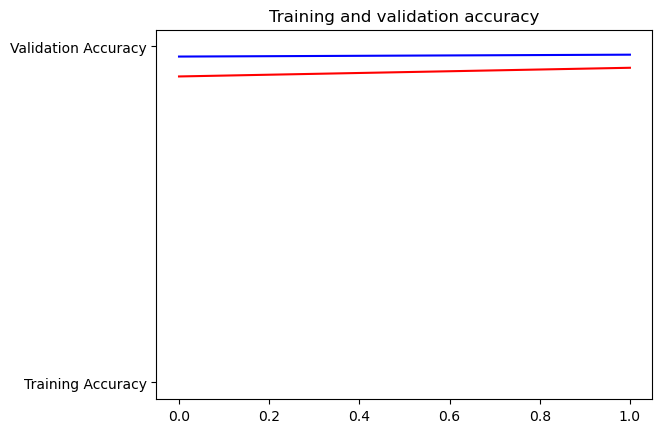

<Figure size 640x480 with 0 Axes>

In [26]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------«
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()



### 7. Predict on a test image

You can upload any image and have the model predict whether it's a dog or a cat.
- Find an image of a dog or cat
- Run the following code cell.  It will ask you to upload an image.
- The model will print "is a dog" or "is a cat" depending on the model's prediction.

In [27]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

ModuleNotFoundError: No module named 'google.colab'

In [28]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model  # If needed
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilenames

# Open a file picker dialog to select image files
Tk().withdraw()  # Close the root window
file_paths = askopenfilenames(title='Select image(s)', filetypes=[("Image files", "*.jpg *.jpeg *.png")])

# If you already have a model loaded, skip this line
# model = load_model('your_model.h5')

for path in file_paths:
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)

    image_tensor = np.vstack([x])
    classes = model.predict(image_tensor)
    print(classes[0])

    filename = os.path.basename(path)
    if classes[0] > 0.5:
        print(f"{filename} is a dog")
    else:
        print(f"{filename} is a cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
[0.5657827]
0.png is a dog


In [29]:
classes

array([[0.5657827]], dtype=float32)

In [30]:
classes.shape

(1, 1)

In [31]:
len(classes)

1

### 8. Optional: Check input image sizes

print("Number of cat images:",len(os.listdir('/tmp/PetImages/Cat/')))

print("Number of dog images:", len(os.listdir('/tmp/PetImages/Dog/')))

The shape of this image is  (281, 300, 3)


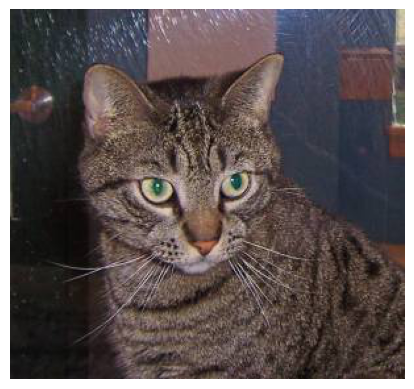

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# img = mpimg.imread('path/to/your/image.jpg')
img = mpimg.imread('/tmp/PetImages/Cat/1.jpg')
print("The shape of this image is ", img.shape)

plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

The shape of this image is  (397, 312, 3)


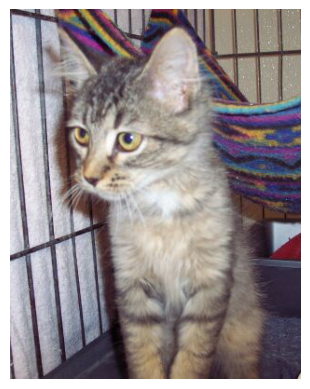

In [30]:
# img = mpimg.imread('path/to/your/image.jpg')
img = mpimg.imread('/tmp/PetImages/Cat/2.jpg')
print("The shape of this image is ", img.shape)

plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

The shape of this image is  (500, 327, 3)


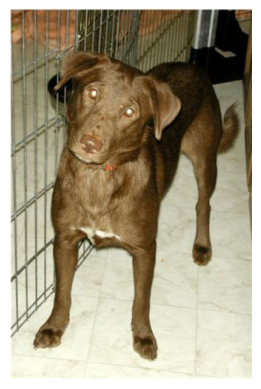

In [31]:
# img = mpimg.imread('path/to/your/image.jpg')
img = mpimg.imread('/tmp/PetImages/Dog/1.jpg')
print("The shape of this image is ", img.shape)

plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

The shape of this image is  (199, 188, 3)


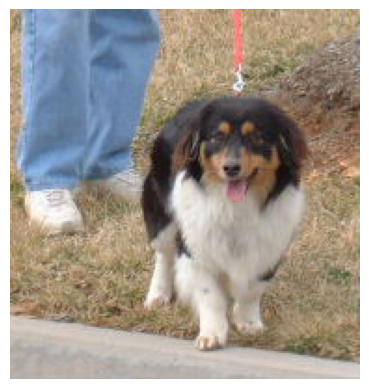

In [32]:
# img = mpimg.imread('path/to/your/image.jpg')
img = mpimg.imread('/tmp/PetImages/Dog/2.jpg')
print("The shape of this image is ", img.shape)

plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()